# Zomato Restaurent Data analysis

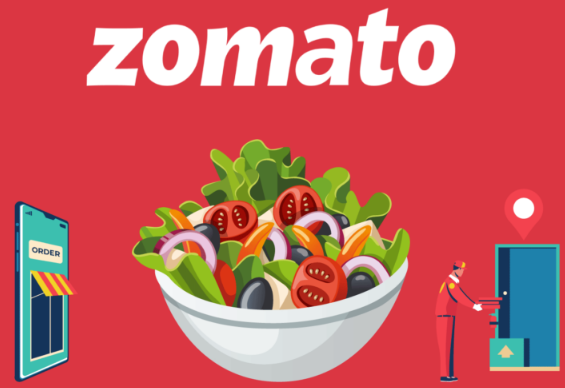

Importing Liabraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Reading the file

In [3]:
df = pd.read_csv('zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


to find out number of rows and columns

In [4]:
df.shape

(51717, 17)

listing of the column names

In [5]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

dropping unwanted columns


In [6]:
df=df.drop(['url','address','phone','dish_liked','reviews_list','menu_item'], axis=1)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


To check for data types and null values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
 10  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


Cleaning column data one by one


to find unique values in rate column

In [7]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

function to remove '/5','nan','new' from rate column

In [8]:
def ratecolumn(value):
    if(value == 'NEW' or value == '-'):
        return np.nan
    else:
       value = str(value).split('/')
       value = value[0]
       return float(value)
df['rate'] = df['rate'].apply(ratecolumn)
df['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

filling null values with mean from rate column

In [9]:
df['rate'].fillna(df['rate'].mean() , inplace = True)
df['rate'].isnull().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51717 non-null  object 
 1   online_order                 51717 non-null  object 
 2   book_table                   51717 non-null  object 
 3   rate                         51717 non-null  float64
 4   votes                        51717 non-null  int64  
 5   location                     51696 non-null  object 
 6   rest_type                    51490 non-null  object 
 7   cuisines                     51672 non-null  object 
 8   approx_cost(for two people)  51371 non-null  object 
 9   listed_in(type)              51717 non-null  object 
 10  listed_in(city)              51717 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.3+ MB


to drop null values from other columns

In [11]:
df.dropna(inplace = True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [12]:
df.shape

(51148, 11)

renaming long column names

In [13]:
df.rename(columns = {'approx_cost(for two people)':'cost2people','listed_in(type)':'type'}, inplace = True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2people,type,listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [14]:
df['cost2people'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

to remove comma from cost2people

In [15]:
def handlecomma(value):
    value = str(value)
    if ',' in value:
        value = value.replace(',','')
        return float(value)
    else:
        return float(value)
df['cost2people'] = df['cost2people'].apply(handlecomma)
df['cost2people'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

cleaning rest type column

In [16]:
df['rest_type'].value_counts()

rest_type
Quick Bites                   19046
Casual Dining                 10273
Cafe                           3687
Delivery                       2578
Dessert Parlor                 2245
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: count, Length: 93, dtype: int64

In [17]:
rest_types = df['rest_type'].value_counts(ascending  = False)
rest_types

rest_type
Quick Bites                   19046
Casual Dining                 10273
Cafe                           3687
Delivery                       2578
Dessert Parlor                 2245
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: count, Length: 93, dtype: int64

In [18]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'RT Nagar', 'MG Road', 'Brigade Road',
       'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road',
       'Shivajinagar', 'Infantry Road', 'St. Marks Road',
       'Cunningham Road', 'Race Course Road', 'Commercial Street',
       'Vasanth Nagar', 'HBR Layout', 'Domlur', 'Ejipura',
       'Jeeva

making rest types less than 1000 as others

In [19]:
rest_types_lessthan1000 = rest_types[rest_types<1000]

def handle_rest_type(value):
    if(value in rest_types_lessthan1000):
        return 'others'
    else:
        return value

df['rest_type']=df['rest_type'].apply(handle_rest_type)
df['rest_type'].value_counts()

rest_type
Quick Bites           19046
Casual Dining         10273
others                 9028
Cafe                   3687
Delivery               2578
Dessert Parlor         2245
Takeaway, Delivery     2014
Bakery                 1141
Casual Dining, Bar     1136
Name: count, dtype: int64

cleaning location column

In [20]:
location = df['location'].value_counts(ascending  = False)

location_lessthan300 = location[location<300]



def handle_location(value):
    if(value in location_lessthan300):
        return 'others'
    else:
        return value
        
df['location'] = df['location'].apply(handle_location)
df['location'].value_counts()

location
BTM                      5071
others                   4962
HSR                      2496
Koramangala 5th Block    2481
JP Nagar                 2219
Whitefield               2109
Indiranagar              2033
Jayanagar                1916
Marathahalli             1808
Bannerghatta Road        1611
Bellandur                1271
Electronic City          1248
Koramangala 1st Block    1237
Brigade Road             1218
Koramangala 7th Block    1176
Koramangala 6th Block    1129
Sarjapur Road            1049
Koramangala 4th Block    1017
Ulsoor                   1017
Banashankari              904
MG Road                   894
Kalyan Nagar              841
Richmond Road             804
Malleshwaram              724
Frazer Town               720
Basavanagudi              684
Residency Road            674
Brookefield               656
Banaswadi                 645
New BEL Road              644
Kammanahalli              640
Rajajinagar               591
Church Street             569
L

cleaning cuisine

In [21]:
cuisines = df['cuisines'].value_counts(ascending  = False)


cuisines_lessthan100 = cuisines[cuisines<100]



def handle_cuisines(value):
    if(value in cuisines_lessthan100):
        return 'others'
    else:
        return value
        
df['cuisines'] = df['cuisines'].apply(handle_cuisines)
df['cuisines'].value_counts()

cuisines
others                                 26220
North Indian                            2858
North Indian, Chinese                   2355
South Indian                            1822
Biryani                                  906
                                       ...  
South Indian, Chinese, North Indian      105
North Indian, Mughlai, Chinese           104
South Indian, Fast Food                  104
Italian, Pizza                           102
North Indian, Chinese, Seafood           102
Name: count, Length: 70, dtype: int64

In [22]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2people,type,listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet,Banashankari


Analysis Findings

In [24]:
b=df.groupby('cuisines')['rate'].mean().reset_index().sort_values(by='rate',ascending=False)
print(b.head(5))

                 cuisines      rate
19         Cafe, Desserts  4.060340
29    Desserts, Beverages  4.045446
18      Cafe, Continental  3.887335
53  North Indian, Mughlai  3.864395
22         Chinese, Momos  3.853386


By this we found that type of cuisines most liked by people in banglore is Continental North and South Indian and Italian

In [25]:
grp2=df.groupby('name')['rate'].mean().reset_index().sort_values(by='rate',ascending=False)[0:10]
print(grp2)

                                                   name      rate
1267                        Byg Brewski Brewing Company  4.900000
593                      Asia Kitchen By Mainland China  4.900000
6502  SantÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃ...  4.900000
5882                                       Punjab Grill  4.871429
859                              Belgian Waffle Factory  4.844828
2579                                           Flechazo  4.800000
5431                                 O.G. Variar & Sons  4.800000
7970                                   The Pizza Bakery  4.800000
128                           AB's - Absolute Barbecues  4.789474
1282                                                CTR  4.750000


these are the restaurents liked by peope in banglore

In [26]:
c=df['listed_in(city)'].value_counts()
c.tail()

listed_in(city)
Frazer Town     1179
Malleshwaram    1093
Rajajinagar     1069
Banashankari     860
New BEL Road     735
Name: count, dtype: int64

these cities have less number of restaurents

# Data Visualization

In [28]:
sns.set()

In [61]:
# Location wise No of of Restaurents

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, 'Banashankari'),
  Text(1, 0, 'Basavanagudi'),
  Text(2, 0, 'others'),
  Text(3, 0, 'Jayanagar'),
  Text(4, 0, 'JP Nagar'),
  Text(5, 0, 'Bannerghatta Road'),
  Text(6, 0, 'BTM'),
  Text(7, 0, 'Electronic City'),
  Text(8, 0, 'HSR'),
  Text(9, 0, 'Marathahalli'),
  Text(10, 0, 'Shanti Nagar'),
  Text(11, 0, 'Koramangala 5th Block'),
  Text(12, 0, 'Richmond Road'),
  Text(13, 0, 'Koramangala 7th Block'),
  Text(14, 0, 'Koramangala 4th Block'),
  Text(15, 0, 'Bellandur'),
  Text(16, 0, 'Sarjapur Road'),
  Text(17, 0, 'Whitefield'),
  Text(18, 0, 'Old Airport Road'),
  Text(19, 0, 'Indiranagar'),
  Text(20, 0, 'Koramangala 1st Block'),
  Text(21, 0, 'Frazer Town'),
  Text(22, 0, 'MG Road'),
  Text(23, 0, 'Brigade Road'),
  Text(24, 0, 'Lavelle Road'),
  Text(25, 0, 'Church Street'),
  

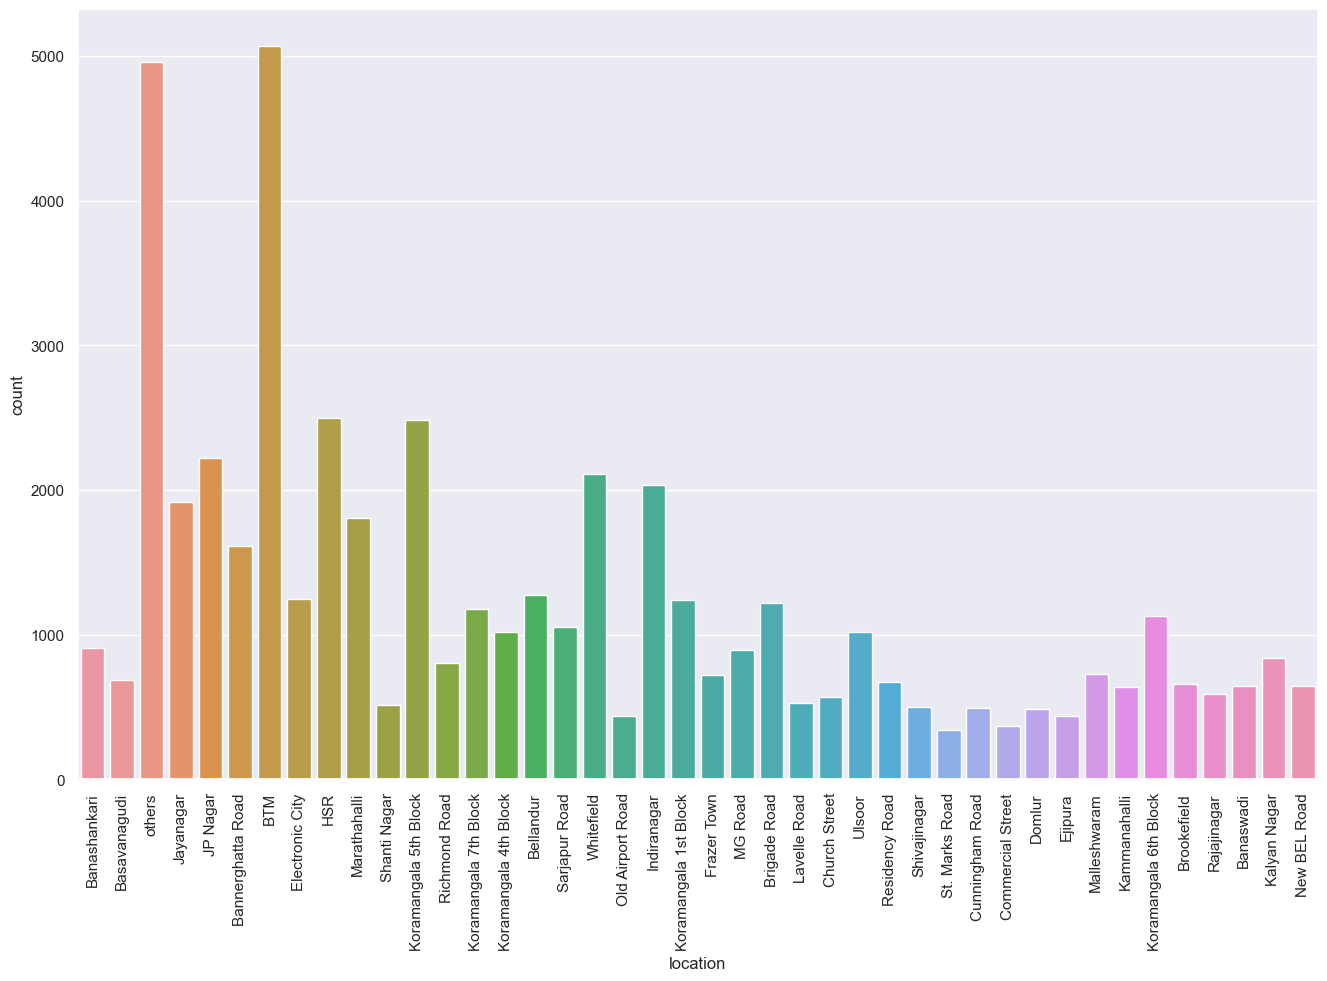

In [29]:
plt.figure(figsize = (16,10))
ax = sns.countplot(df, x='location')
plt.xticks(rotation=90)

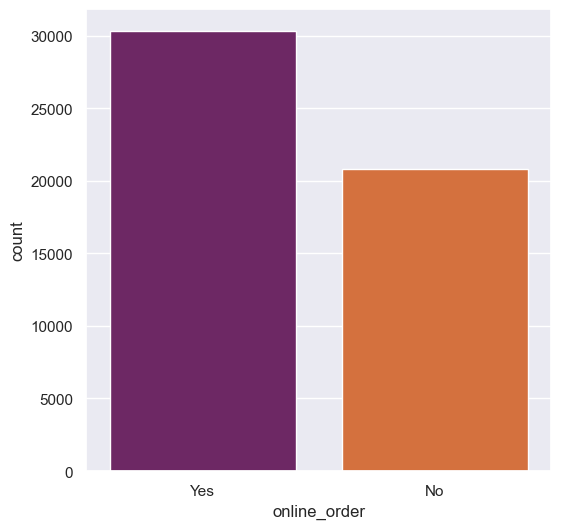

In [30]:
plt.figure(figsize = (6,6))
sns.countplot(df,x='online_order', palette = 'inferno')
plt.show()

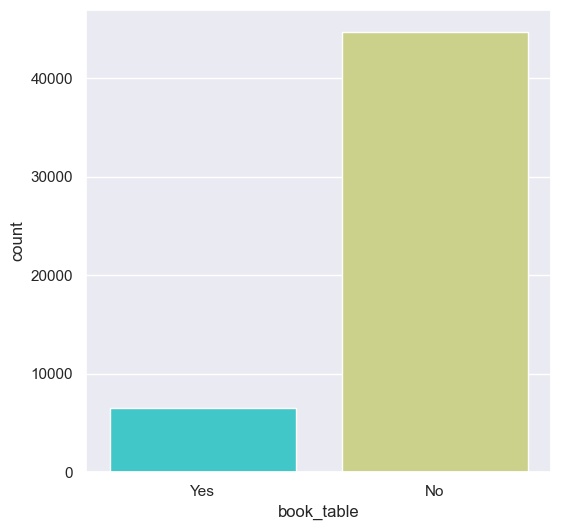

In [31]:
plt.figure(figsize = (6,6))
sns.countplot(df,x='book_table', palette = 'rainbow')
plt.show()

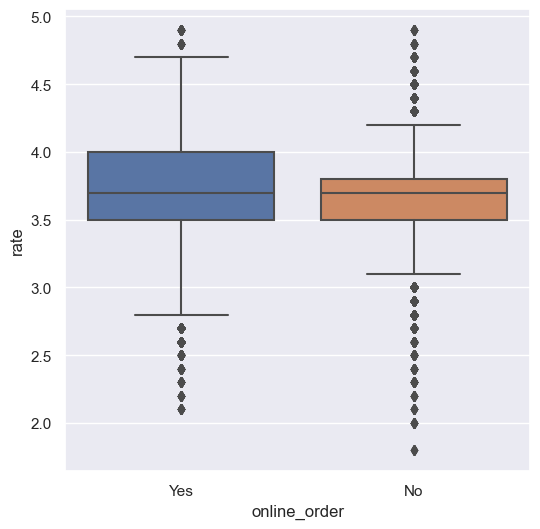

In [32]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = df)
plt.show()

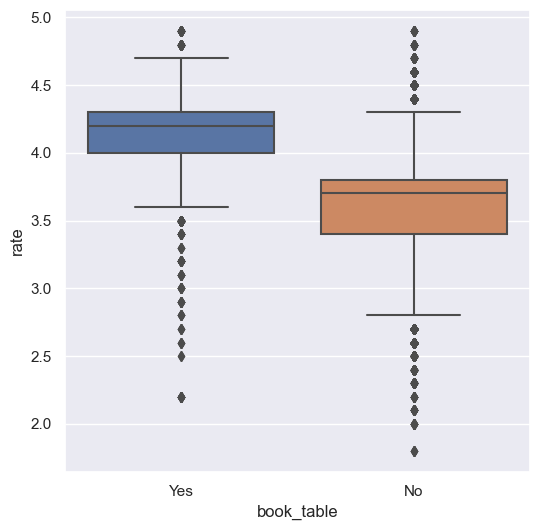

In [33]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'book_table', y = 'rate', data = df)
plt.show()

In [36]:
df1 = df.groupby(['location','online_order'])['name'].count()
df1.to_csv('location_online.csv')
df1 = pd.read_csv('location_online.csv')
df1 = pd.pivot_table(df1, values=None, index=['location'], columns=['online_order'], fill_value=0, aggfunc=np.sum)
df1

name      
online_order             No   Yes
location                         
BTM                    1766  3305
Banashankari            397   507
Banaswadi               302   343
Bannerghatta Road       687   924
Basavanagudi            243   441
Bellandur               519   752
Brigade Road            553   665
Brookefield             239   417
Church Street           226   343
Commercial Street       228   142
Cunningham Road         168   323
Domlur                  247   235
Ejipura                 214   220
Electronic City         676   572
Frazer Town             288   432
HSR                     585  1911
Indiranagar             701  1332
JP Nagar                911  1308
Jayanagar               552  1364
Kalyan Nagar            350   491
Kammanahalli            265   375
Koramangala 1st Block   384   853
Koramangala 4th Block   459   558
Koramangala 5th Block   867  1614
Koramangala 6th Block   445   684
Koramangala 7th Block   390   786
Lavelle Road            317   206
MG Road                 520   374
Malleshwaram            309   415
Marathahalli            701  1107
New BEL Road            255   389
Old Airport Road        221   216
Rajajinagar             286   305
Residency Road          426   248
Richmond Road           557   247
Sarjapur Road           324   725
Shanti Nagar            289   222
Shivajinagar            354   145
St. Marks Road          176   167
Ulsoor                  389   628
Whitefield              986  1123
others                 2065  2897

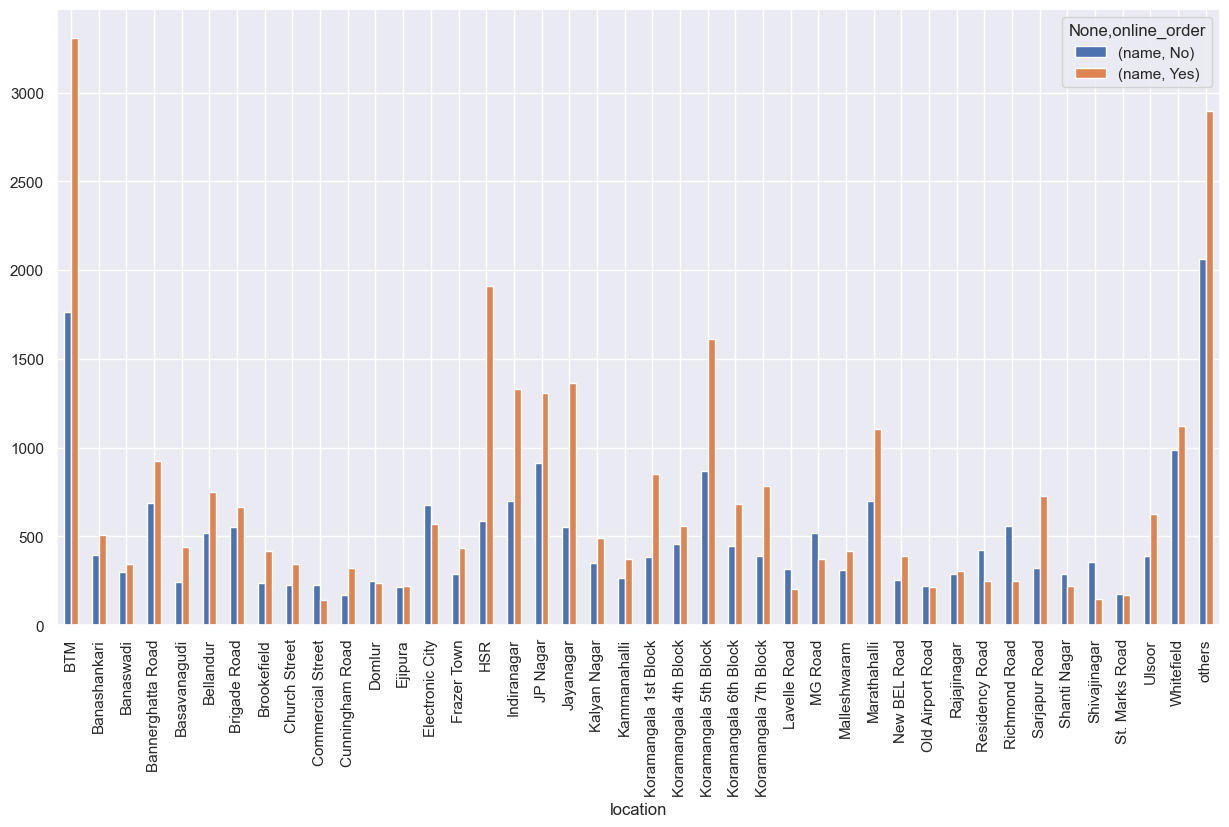

In [39]:
df1.plot(kind = 'bar', figsize = (15,8))
plt.show()

In [40]:
df4 = df[['location', 'votes']]
df4.drop_duplicates()
df5 = df4.groupby(['location'])['votes'].sum()
df5 = df5.to_frame()
df5 = df5.sort_values('votes', ascending=False)
df5.head()

,votes
location,
Koramangala 5th Block,2214827
Indiranagar,1172729
Koramangala 4th Block,685156
Church Street,594979
JP Nagar,586522


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, 'Koramangala 5th Block'),
  Text(1, 0, 'Indiranagar'),
  Text(2, 0, 'Koramangala 4th Block'),
  Text(3, 0, 'Church Street'),
  Text(4, 0, 'JP Nagar'),
  Text(5, 0, 'BTM'),
  Text(6, 0, 'others'),
  Text(7, 0, 'Lavelle Road'),
  Text(8, 0, 'HSR'),
  Text(9, 0, 'Koramangala 7th Block'),
  Text(10, 0, 'Jayanagar'),
  Text(11, 0, 'Whitefield'),
  Text(12, 0, 'Koramangala 6th Block'),
  Text(13, 0, 'Marathahalli'),
  Text(14, 0, 'Brigade Road'),
  Text(15, 0, 'MG Road'),
  Text(16, 0, 'Sarjapur Road'),
  Text(17, 0, 'Residency Road'),
  Text(18, 0, 'Cunningham Road'),
  Text(19, 0, 'St. Marks Road'),
  Text(20, 0, 'Koramangala 1st Block'),
  Text(21, 0, 'Malleshwaram'),
  Text(22, 0, 'Bannerghatta Road'),
  Text(23, 0, 'Bellandur'),
  Text(24, 0, 'Ulsoor'),
  Text(25, 0, 'New BEL Road'),

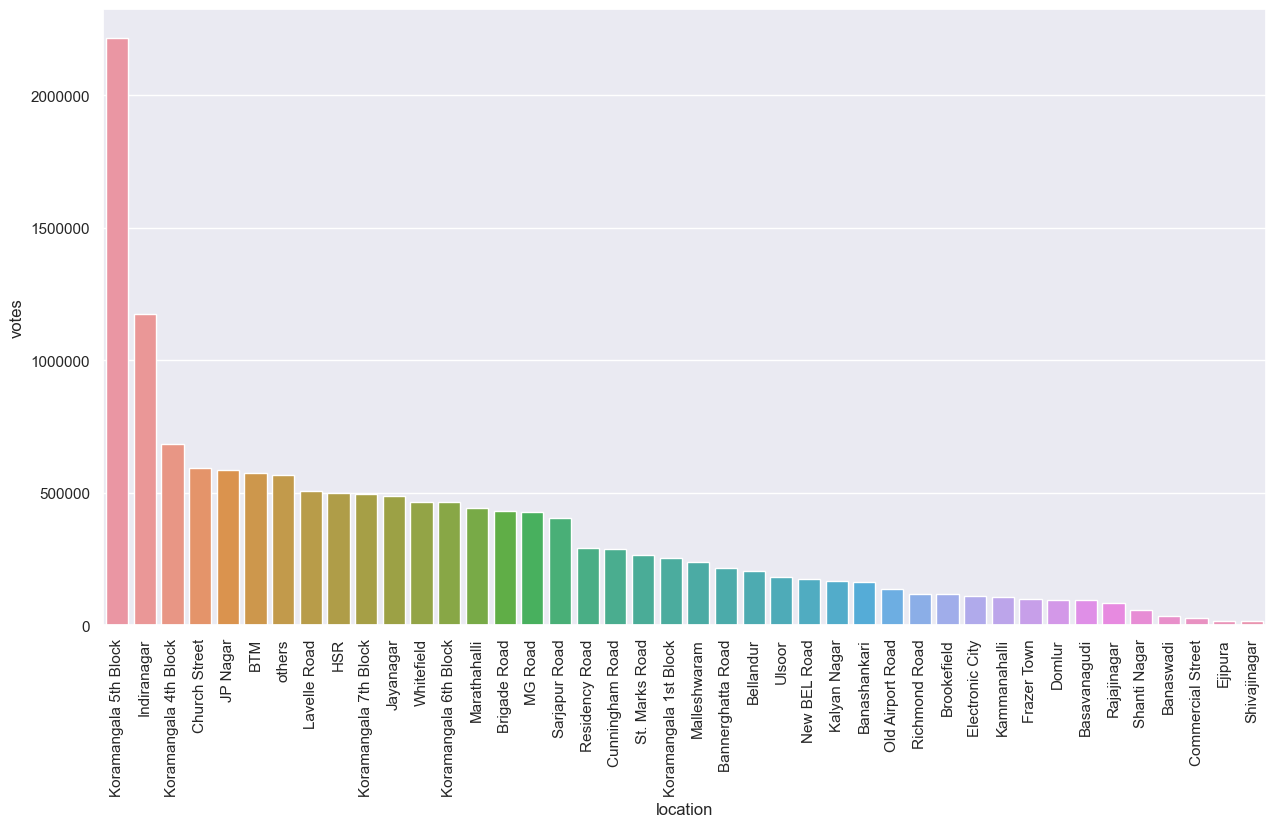

In [42]:
plt.figure(figsize = (15,8))
ax = sns.barplot(df5,x=df5.index,y='votes')
ax.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation = 90)

In [52]:
# Excluding the  'others' cusisne type
df6 = df[df['cuisines'] != 'others']
df6 = df6[['cuisines', 'votes']]
df6.drop_duplicates()
df7 = df6.groupby(['cuisines'])['votes'].sum()
df7 = df7.to_frame()
df7 = df7.sort_values('votes', ascending=False)
df7 = df7.head()
df7

,votes
cuisines,
North Indian,516346
"North Indian, Chinese",258587
South Indian,161983
"North Indian, Mughlai",103738
Chinese,101736


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'North Indian'),
  Text(1, 0, 'North Indian, Chinese'),
  Text(2, 0, 'South Indian'),
  Text(3, 0, 'North Indian, Mughlai'),
  Text(4, 0, 'Chinese')])

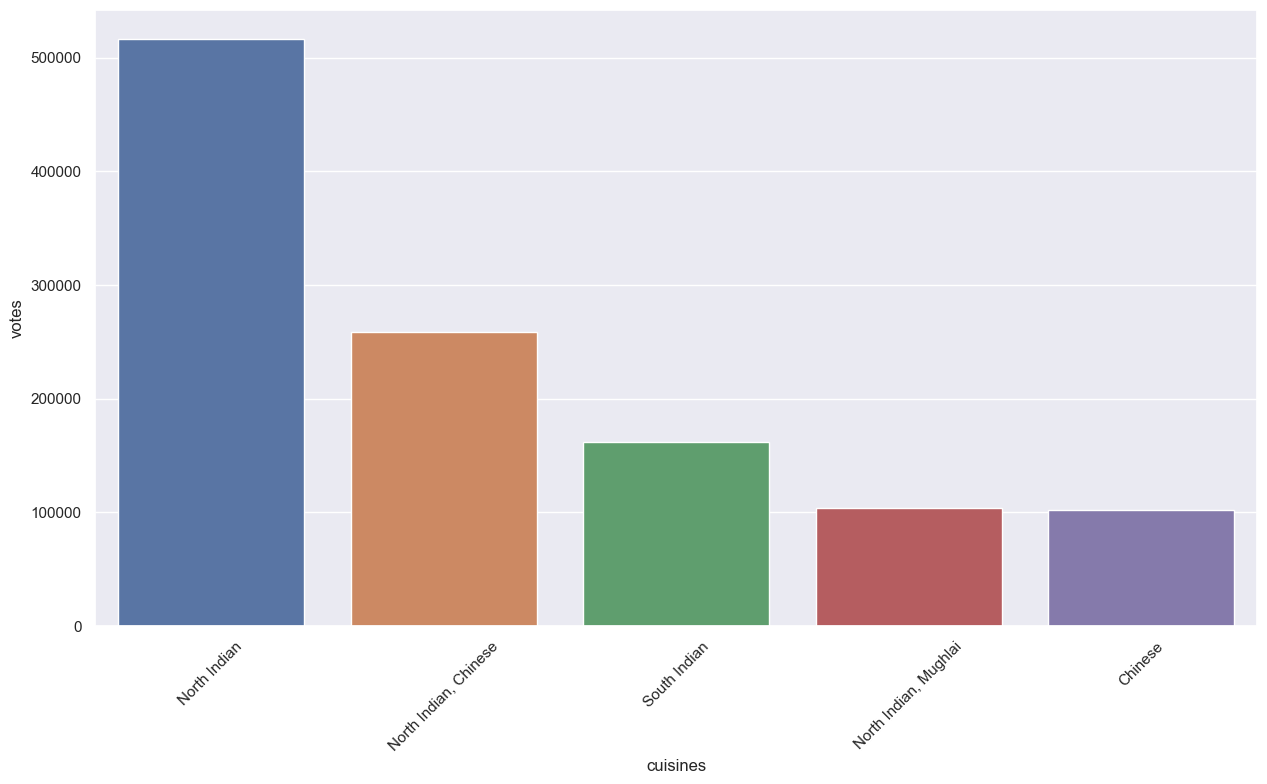

In [54]:
plt.figure(figsize = (15,8))
sns.barplot(df7.head(),x=df7.index,y='votes')
plt.xticks(rotation = 45)

In [56]:
df8 = df['online_order'].value_counts()
df8

online_order
Yes    30311
No     20837
Name: count, dtype: int64

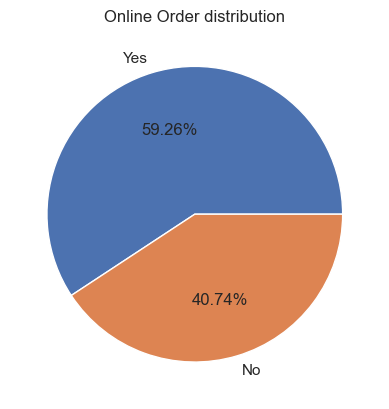

In [60]:
df8.plot(kind = 'pie', autopct = '%1.2f%%')
plt.ylabel(None)
plt.title('Online Order distribution')
plt.show()

In [62]:
# Rating distribution

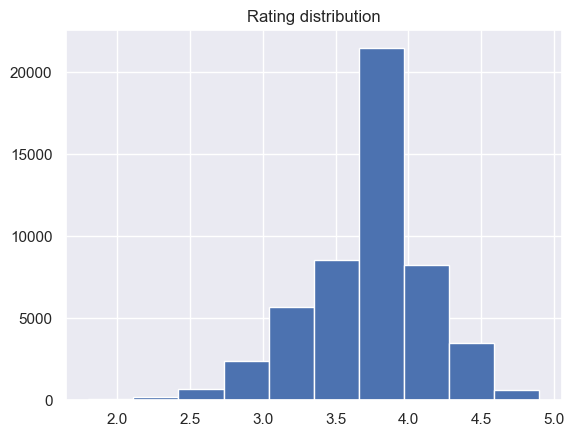

In [73]:
df['rate'].hist()
plt.title('Rating distribution')
plt.show()

In [98]:
# Restaurent type Distribution

In [78]:
df8 = df['type'].value_counts().head()
df8

type
Delivery              25653
Dine-out              17583
Desserts               3559
Cafes                  1703
Drinks & nightlife     1091
Name: count, dtype: int64

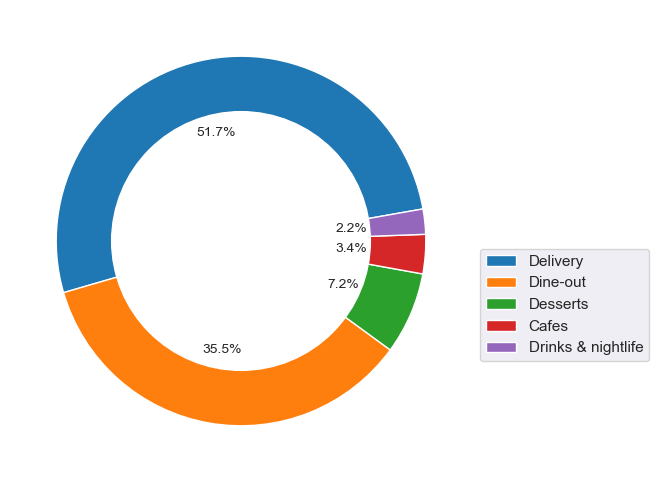

In [97]:
plt.figure(figsize=(6, 6))
plt.pie(df8.values, labels=[''] * len(df8.index), autopct='%1.1f%%', startangle=10, colors=plt.cm.tab10.colors, textprops={'fontsize': 10})
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white'))

plt.legend(df8.index, loc='best', bbox_to_anchor=(1, 0.5))
# Show plot
plt.show()

In [102]:
# Pricing

In [123]:
df9 = df.groupby('location')['cost2people'].mean().sort_values(ascending = True).round(2)
df9

location
Ejipura                   320.51
Shivajinagar              344.79
Basavanagudi              360.98
Commercial Street         392.30
Banaswadi                 394.81
BTM                       395.71
Banashankari              421.83
Frazer Town               426.81
Koramangala 1st Block     431.33
Rajajinagar               435.87
Brookefield               439.63
Bannerghatta Road         443.90
Shanti Nagar              451.27
Kammanahalli              456.03
Jayanagar                 476.75
HSR                       476.98
New BEL Road              484.16
Electronic City           497.79
others                    502.15
Marathahalli              513.91
JP Nagar                  523.88
Bellandur                 529.95
Malleshwaram              551.37
Sarjapur Road             572.97
Kalyan Nagar              584.35
Koramangala 7th Block     594.13
Whitefield                599.84
Domlur                    605.15
Koramangala 6th Block     620.37
Brigade Road              650.94
I

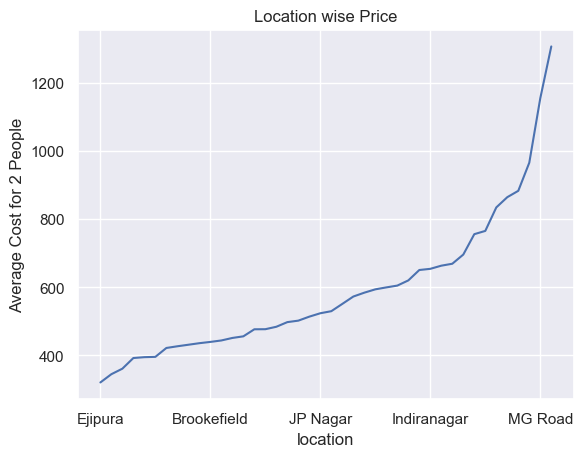

In [124]:
df9.plot()
plt.title('Location wise Price')
plt.ylabel('Average Cost for 2 People')
plt.show()